In [10]:
clear all
addpath(genpath('../'))


# RF Pulses

The purpose of appling RF magnetic fields is to excite the spins.  Equivalently, this RF energy aims to flip the net magnetization.

This RF energy is referred to as an RF pulse, since the RF energy is applied for a short period of time and then switched off.

## Selective RF Pulses

Another key function of RF pulses is slice-selection.  This means applying a shaped RF pulse along with a magnetic field gradient that only flips the net magnetization within a slice.

This is first achieved by applying RF pulses that are frequency selective, meaning they only contain a range of resonant frequencies and thus these are the only frequencies excited.  Illustrated in the plots below are:

1. Sinusoidal RF pulse, exciting a single resonance frequency
1. Adding multiple frequencies together to creating a "slice" of frequencies that are excited 
1. Multiple frequencies is equivalent to a sinc-shaped pulse
1. Convert this frequency profile to a slice profile with a magnetic field gradient

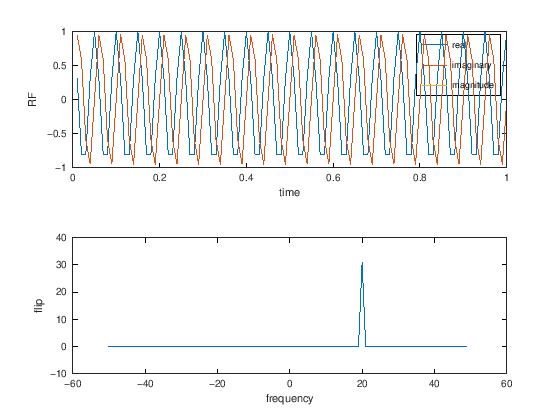

In [27]:
% Sinusoid has a single resonance frequency

dt = 0.01;
tmax = 1;
N = tmax/dt;
t = [1:N]*dt;
% frequency of RF
f0 = 20;

rf_sinusoid = exp(i*2*pi*f0*t);

f = [-N/2:N/2-1]/(N*dt);
% Fourier Transform used to approximate the RF pulse profile (small tip approximation)
FT_sinusoid = fftshift(fft(rf_sinusoid));

subplot(211)
plot(t,real(rf_sinusoid), t,imag(rf_sinusoid), t, abs(rf_sinusoid))
xlabel('time'), ylabel('RF'), legend('real','imaginary', 'magnitude')

subplot(212)
plot(f,FT_sinusoid)
xlabel('frequency'), ylabel('flip')

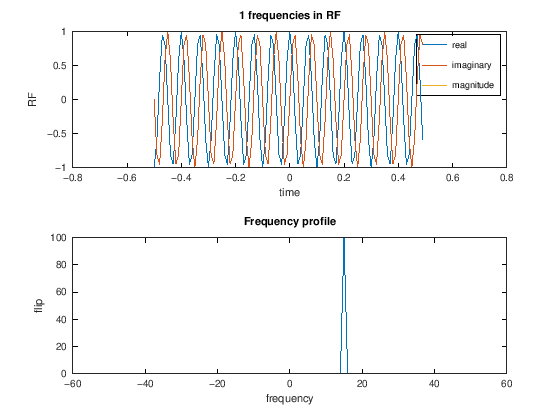

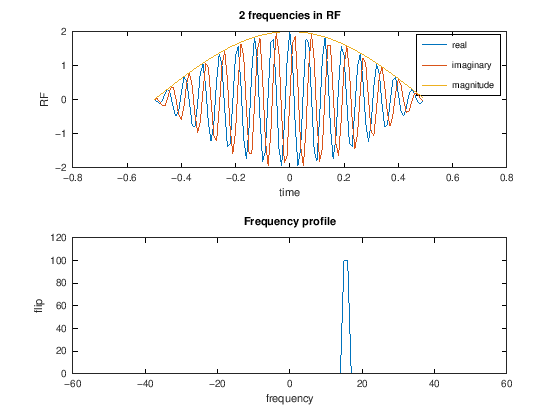

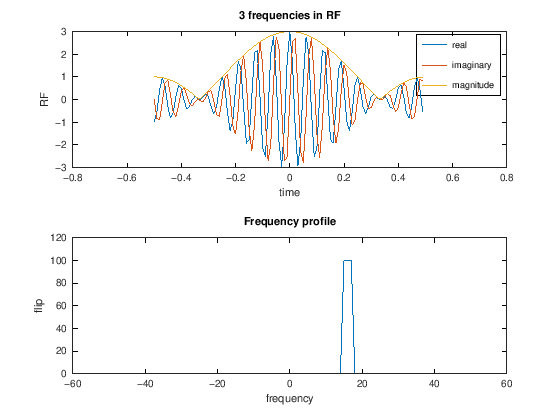

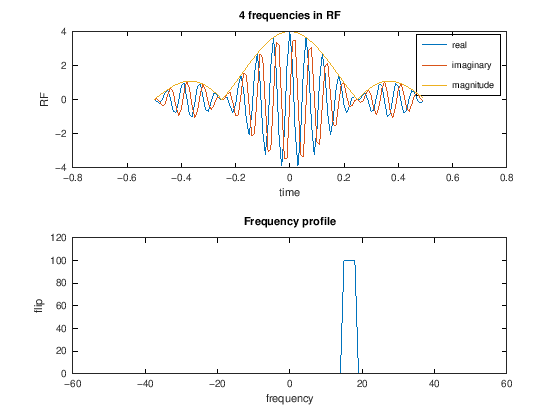

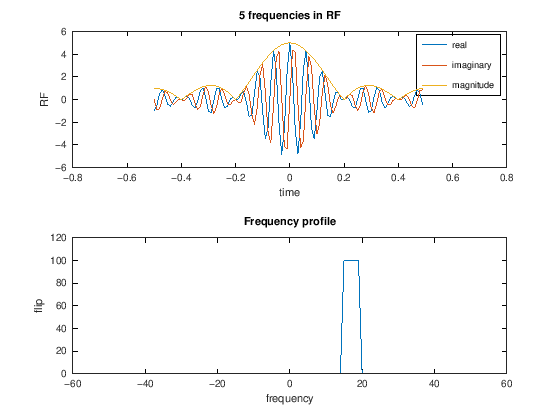

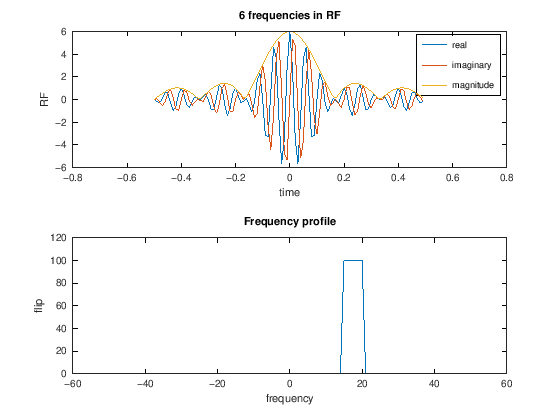

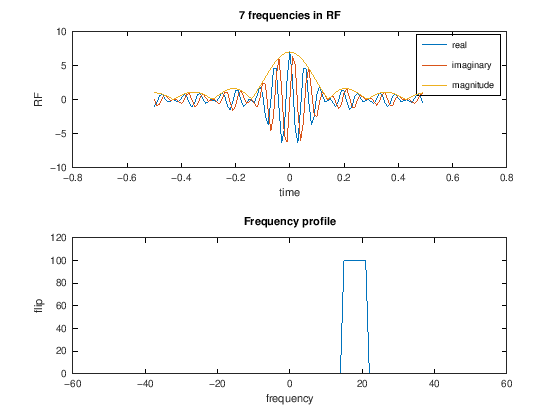

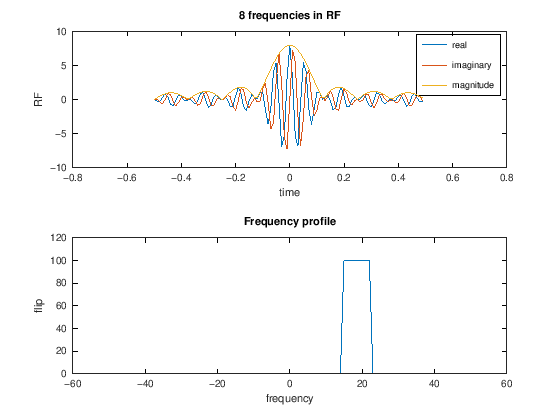

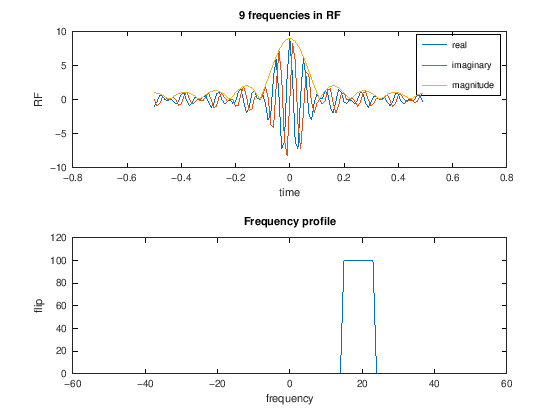

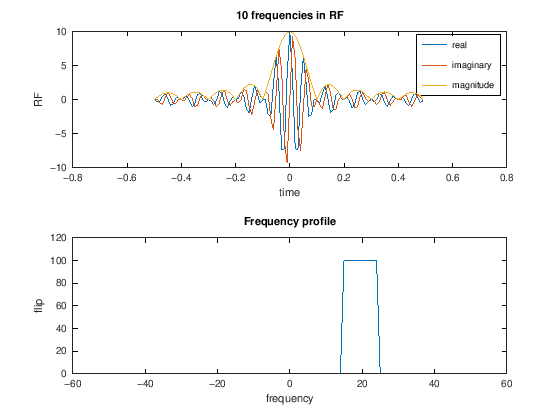

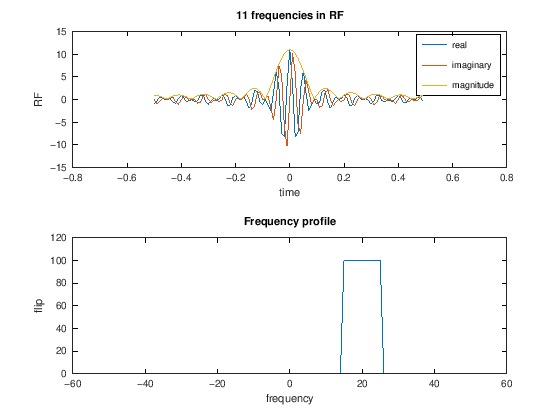

In [28]:
% To excite a slice, we create a RF pulse with a range of frequencies, used while applying magnetic field gradient


dt = 0.01;
tmax = 1;
N = tmax/dt;
t = [-N/2:N/2-1]*dt;
% center frequency of RF
f0 = 20;

% range of frequencies to sum
df = [-5:5];

[tmat dfmat] = meshgrid(t,df+f0);
rf_all = exp(i*2*pi*dfmat.*tmat);

f = [-N/2:N/2-1]/(N*dt);

for n = 1:length(df)
    rf_n = sum(rf_all(1:n,:),1);

    % Fourier Transform used to approximate the RF pulse profile (small tip approximation)
    FT_n = fftshift(fft(rf_n));

    figure
    subplot(211)
    plot(t,real(rf_n), t,imag(rf_n), t, abs(rf_n))
    xlabel('time'), ylabel('RF'), legend('real','imaginary', 'magnitude')

    title([int2str(n) ' frequencies in RF'])
    subplot(212)
    plot(f,abs(FT_n))
    title('Frequency profile')
    xlabel('frequency'), ylabel('flip')

end


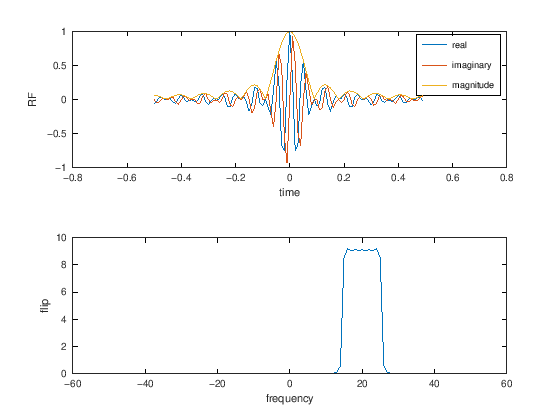

In [29]:
% This sum of sinusoids is a sinc function!


dt = 0.01;
tmax = 1;
N = tmax/dt;
t = [-N/2:N/2-1]*dt;

% frequency of RF
f0 = 20; % center frequency
fwidth = 11; % frequency range
rf_sinc = exp(i*2*pi*f0*t).*sinc(fwidth*(t));

f = [-N/2:N/2-1]/(N*dt);
% Fourier Transform used to approximate the RF pulse profile (small tip approximation)
FT_sinc = fftshift(fft(rf_sinc));

subplot(211)
plot(t,real(rf_sinc), t,imag(rf_sinc), t, abs(rf_sinc))
xlabel('time'), ylabel('RF'), legend('real','imaginary', 'magnitude')
subplot(212)
plot(f,abs(FT_sinc))
xlabel('frequency'), ylabel('flip')

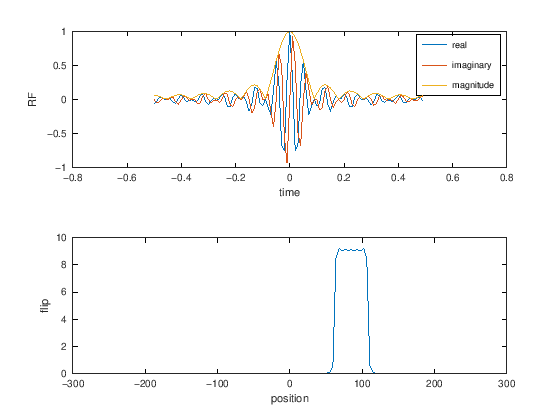

In [30]:
% Convert this plot to slice profile with gradient

Gz = .1;
gammabar = 42.58;
z = gammabar*f*Gz;

subplot(211)
plot(t,real(rf_sinc), t,imag(rf_sinc), t, abs(rf_sinc))
xlabel('time'), ylabel('RF'), legend('real','imaginary', 'magnitude')
subplot(212)
plot(z,abs(FT_sinc))
xlabel('position'), ylabel('flip')

In [24]:
% animate rotating frame - single frequency hard pulse, multi-frequency hard pulse, single frequency sinc pulse

In [ ]:
% dzrf
% simulate RF profile
% stretch, change flip, change location
% gradient